<a href="https://colab.research.google.com/github/WilliamAshbee/computervision/blob/main/HarrisCornerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from skimage.io import imread
from skimage.color import rgb2gray

img = imread('box.jpg')
imggray = rgb2gray(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [5]:
from scipy.ndimage import gaussian_filter

Ixx = gaussian_filter(I_x**2, sigma=1)
Ixy = gaussian_filter(I_y*I_x, sigma=1)
Iyy = gaussian_filter(I_y**2, sigma=1)

In [6]:
Ixx

array([[7.37923514, 3.40759338, 0.67265867, ..., 0.67265867, 3.40759338,
        7.37923514],
       [8.92683085, 4.12224426, 0.8137307 , ..., 0.8137307 , 4.12224426,
        8.92683085],
       [9.99252948, 4.61436404, 0.91087511, ..., 0.91087511, 4.61436404,
        9.99252948],
       ...,
       [9.99252948, 4.61436404, 0.91087511, ..., 0.91087511, 4.61436404,
        9.99252948],
       [8.92683085, 4.12224426, 0.8137307 , ..., 0.8137307 , 4.12224426,
        8.92683085],
       [7.37923514, 3.40759338, 0.67265867, ..., 0.67265867, 3.40759338,
        7.37923514]])

In [7]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [9]:
harris_response.shape

(353, 454)

In [11]:
r = None#alternative exists

In [12]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]


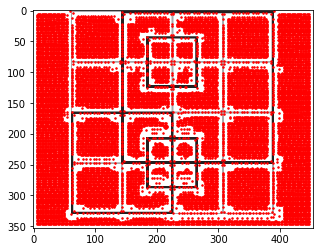

In [16]:
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt

corners = corner_peaks(harris_response,min_distance=1)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)


In [22]:
from skimage.feature import corner_fast, corner_peaks
square = np.zeros((12, 12))
square[3:9, 3:9] = 1
corners = corner_peaks(corner_fast(square, 9), min_distance=1)


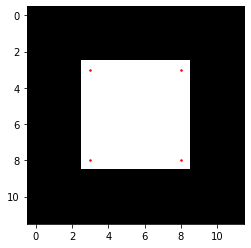

In [25]:
fig, ax = plt.subplots()
ax.imshow(square, interpolation='nearest', cmap=plt.cm.gray)

ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)


In [24]:
plt.show()